In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
from functools import reduce
pd.set_option('display.max_rows', None)

### Extract

In [3]:
#Read csv file
df_merge = pd.read_csv("Final_yelp_zip_summary.csv")

print(f"Shape of Yelp dataset:{df_merge.shape}")
df_merge.head()

Shape of Yelp dataset:(13988, 26)


,postal_code,City,State,CountyName,2021,total_restaurants,total_reviews,avg_rating,total_delivery,total_pickup,...,total_1.0_stars,total_1.5_stars,total_2.0_stars,total_2.5_stars,total_3.0_stars,total_3.5_stars,total_4.0_stars,total_4.5_stars,total_5.0_stars,num_rest_types
0,1267.0,Williamstown,MA,Berkshire County,357029.0,23,1347.0,3.782609,1.0,2.0,...,1.0,0.0,0.0,0.0,2.0,5.0,11.0,3.0,1.0,23
1,2134.0,Boston,MA,Suffolk County,620830.0,1,2.0,4.500000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,2886.0,Warwick,RI,Kent County,315398.0,1,28.0,2.000000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,3079.0,Salem,NH,Rockingham County,458081.0,1,1.0,5.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
4,3276.0,Northfield,NH,Merrimack County,283171.0,1,1.0,2.000000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [4]:
#check for null values
df_merge.isna().sum()

postal_code               0
City                      0
State                     0
CountyName                0
2021                      0
total_restaurants         0
total_reviews             0
avg_rating                0
total_delivery            0
total_pickup              0
total_rest_reservation    0
total_price_1             0
total_price_2             0
total_price_3             0
total_price_4             0
total_0.0_stars           0
total_1.0_stars           0
total_1.5_stars           0
total_2.0_stars           0
total_2.5_stars           0
total_3.0_stars           0
total_3.5_stars           0
total_4.0_stars           0
total_4.5_stars           0
total_5.0_stars           0
num_rest_types            0
dtype: int64

In [5]:
#check for duplicates
df_merge.duplicated().sum()

0

In [44]:
df_merge.City.value_counts()

New York                       178
Houston                        107
Los Angeles                    100
Chicago                         56
San Antonio                     56
Dallas                          51
Austin                          48
Phoenix                         48
Philadelphia                    47
Las Vegas                       46
Columbus                        46
Kansas City                     43
Washington                      40
Louisville                      39
Jacksonville                    37
Springfield                     36
Indianapolis                    35
Oklahoma City                   35
Portland                        34
San Diego                       34
Arlington                       33
Omaha                           32
Nashville                       32
Jackson                         32
Cleveland                       32
Denver                          32
Detroit                         31
Fort Worth                      30
San Jose            

In [46]:
df_merge_city = df_merge.groupby('City').filter(lambda x : len(x)>=5)
df_merge_city.shape

(5564, 26)

### Create a dataframe to define neighborhood tiers

House prices in every state and city are very different accross the country, for example, house prices for similar size/type houses in San Jose, CA and Tucson, AZ are dramatically different. To eliminate the bias of very large and small data in housing prices, we will calculate a multiplier. 

* We will first calculate the mean house price group by County
* Next we will divide each postal_code's house price by the corresponding County's mean house price
* This gives us a multiplier for each house price in the dataframe.

In [215]:
# Calculate the average house price per county
per_county_mean_price = df_merge.groupby(['State']).median()['2021'].round(0)

In [216]:
per_county_mean_price.head()

State
AK    283657.0
AL    140873.0
AR    116897.0
AZ    336809.0
CA    721369.0
Name: 2021, dtype: float64

In [217]:
# create dataframe that shows Average County House Price
county_price_df = pd.DataFrame({"Average State House Price": per_county_mean_price})

In [218]:
county_price_df.head()

,Average State House Price
State,
AK,283657.0
AL,140873.0
AR,116897.0
AZ,336809.0
CA,721369.0


In [219]:
# Merge dataframes
frames2 = [df_merge, county_price_df]
neighborhood_df = reduce(lambda left,right: pd.merge(left,right,on='State'), frames2)

In [220]:
neighborhood_df.head(10)

,postal_code,City,State,CountyName,2021,total_restaurants,total_reviews,avg_rating,total_delivery,total_pickup,...,total_1.5_stars,total_2.0_stars,total_2.5_stars,total_3.0_stars,total_3.5_stars,total_4.0_stars,total_4.5_stars,total_5.0_stars,num_rest_types,Average State House Price
0,1267.0,Williamstown,MA,Berkshire County,357029.0,23,1347.0,3.782609,1.0,2.0,...,0.0,0.0,0.0,2.0,5.0,11.0,3.0,1.0,23,488930.0
1,2134.0,Boston,MA,Suffolk County,620830.0,1,2.0,4.500000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,488930.0
2,2886.0,Warwick,RI,Kent County,315398.0,1,28.0,2.000000,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,315398.0
3,3079.0,Salem,NH,Rockingham County,458081.0,1,1.0,5.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,370626.0
4,3276.0,Northfield,NH,Merrimack County,283171.0,1,1.0,2.000000,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,370626.0
5,5031.0,Barnard,VT,Windsor County,409866.0,41,322.0,3.780488,0.0,0.0,...,0.0,2.0,1.0,4.0,6.0,17.0,7.0,3.0,21,264259.0
6,5032.0,Bethel,VT,Windsor County,269285.0,13,40.0,3.500000,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,5.0,2.0,1.0,9,264259.0
7,5033.0,Bradford,VT,Orange County,207608.0,19,82.0,3.736842,0.0,0.0,...,0.0,0.0,2.0,3.0,1.0,10.0,3.0,0.0,19,264259.0
8,5034.0,Bridgewater,VT,Windsor County,303727.0,12,81.0,4.000000,0.0,0.0,...,0.0,0.0,0.0,2.0,1.0,5.0,3.0,1.0,11,264259.0
9,5035.0,Bridgewater,VT,Windsor County,242968.0,5,27.0,3.900000,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,5,264259.0


In [222]:
#Calculate multiplier/indicator to address outliers
neighborhood_df["Neighborhood Indicator"] = neighborhood_df["2021"]/neighborhood_df["Average State House Price"]

In [223]:
neighborhood_df.head(10)

,postal_code,City,State,CountyName,2021,total_restaurants,total_reviews,avg_rating,total_delivery,total_pickup,...,total_2.0_stars,total_2.5_stars,total_3.0_stars,total_3.5_stars,total_4.0_stars,total_4.5_stars,total_5.0_stars,num_rest_types,Average State House Price,Neighborhood Indicator
0,1267.0,Williamstown,MA,Berkshire County,357029.0,23,1347.0,3.782609,1.0,2.0,...,0.0,0.0,2.0,5.0,11.0,3.0,1.0,23,488930.0,0.730225
1,2134.0,Boston,MA,Suffolk County,620830.0,1,2.0,4.500000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,488930.0,1.269773
2,2886.0,Warwick,RI,Kent County,315398.0,1,28.0,2.000000,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,315398.0,1.000000
3,3079.0,Salem,NH,Rockingham County,458081.0,1,1.0,5.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,370626.0,1.235966
4,3276.0,Northfield,NH,Merrimack County,283171.0,1,1.0,2.000000,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,370626.0,0.764034
5,5031.0,Barnard,VT,Windsor County,409866.0,41,322.0,3.780488,0.0,0.0,...,2.0,1.0,4.0,6.0,17.0,7.0,3.0,21,264259.0,1.551001
6,5032.0,Bethel,VT,Windsor County,269285.0,13,40.0,3.500000,0.0,0.0,...,0.0,1.0,1.0,1.0,5.0,2.0,1.0,9,264259.0,1.019019
7,5033.0,Bradford,VT,Orange County,207608.0,19,82.0,3.736842,0.0,0.0,...,0.0,2.0,3.0,1.0,10.0,3.0,0.0,19,264259.0,0.785623
8,5034.0,Bridgewater,VT,Windsor County,303727.0,12,81.0,4.000000,0.0,0.0,...,0.0,0.0,2.0,1.0,5.0,3.0,1.0,11,264259.0,1.149353
9,5035.0,Bridgewater,VT,Windsor County,242968.0,5,27.0,3.900000,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,2.0,0.0,5,264259.0,0.919431


### Create neighborhood tiers


In [224]:
# check ranges for determining bins

#check the lower quantile indicator
neighborhood_df["Neighborhood Indicator"].quantile(q=0.25)


0.7251533916407629

In [240]:
#check the upper quantile indicator
neighborhood_df["Neighborhood Indicator"].quantile(q=0.5)

1.0

In [233]:
#check the upper quantile indicator
neighborhood_df["Neighborhood Indicator"].quantile(q=0.75)

1.3934189213400872

In [234]:
#check the max indicator
neighborhood_df["Neighborhood Indicator"].max()

20.480847986785335

### Tiers

|    Tier1          |    Tier2         |     Tier3      |     
|-------------------|------------------|----------------|
|  >=1.15           | 0.77>Tier2>1.15  |    <=0.77      |
|-------------------|------------------|----------------|
| high tier         |   median tier.   |   low tier.    |
|-------------------|------------------|----------------|


In [246]:
# Cut the neighborhood indicator into the tiers.
spending_bins = [0, 1, 21]
group_names = ["2", "1"]


In [247]:
# Categorize neighborhood indicators based on the bins.
neighborhood_df["Neighborhood Tiers"] = pd.cut(neighborhood_df["Neighborhood Indicator"], spending_bins, labels=group_names)
neighborhood_df.head()

,postal_code,City,State,CountyName,2021,total_restaurants,total_reviews,avg_rating,total_delivery,total_pickup,...,total_2.5_stars,total_3.0_stars,total_3.5_stars,total_4.0_stars,total_4.5_stars,total_5.0_stars,num_rest_types,Average State House Price,Neighborhood Indicator,Neighborhood Tiers
0,1267.0,Williamstown,MA,Berkshire County,357029.0,23,1347.0,3.782609,1.0,2.0,...,0.0,2.0,5.0,11.0,3.0,1.0,23,488930.0,0.730225,2
1,2134.0,Boston,MA,Suffolk County,620830.0,1,2.0,4.500000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,488930.0,1.269773,1
2,2886.0,Warwick,RI,Kent County,315398.0,1,28.0,2.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,315398.0,1.000000,2
3,3079.0,Salem,NH,Rockingham County,458081.0,1,1.0,5.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3,370626.0,1.235966,1
4,3276.0,Northfield,NH,Merrimack County,283171.0,1,1.0,2.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,370626.0,0.764034,2


In [248]:
neighborhood_df["Neighborhood Tiers"].value_counts()

2    7007
1    6981
Name: Neighborhood Tiers, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa4ed0bf110>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa4ecff2a50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa4ed0bf450>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa4ecff2390>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa4ecfecd90>],
 'means': []}

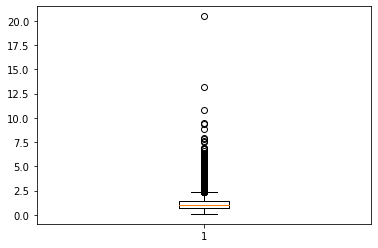

In [249]:
x=neighborhood_df["Neighborhood Indicator"]
plt.boxplot(x)

In [250]:
# Export joined_df to csv
file = "neighborhood_two_tier_state_final.csv"
neighborhood_df.to_csv(file, index=False)